(90, 36)


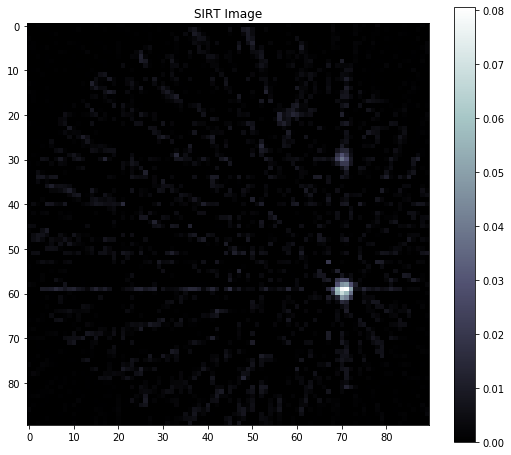

In [2]:
import numpy as np
import astra
from skimage.transform import iradon
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

sino_2kev=np.load("Desktop/CT imaging/27-5-2021/sino_2kev.npy")
subtraction=sino_2kev[7]-sino_2kev[5]
print(np.shape(subtraction))
theta=np.arange(0,360,10)

#create geometries and projector
proj_geom = astra.create_proj_geom('parallel', 1,90, np.arange(0,2*np.pi,np.pi/18));
vol_geom = astra.create_vol_geom(90,90);
sinogram = astra.data2d.create('-sino',proj_geom,np.transpose(subtraction));
recon_id = astra.data2d.create('-vol', vol_geom,data=iradon(subtraction,theta=theta))
proj_id= astra.create_projector('line',proj_geom,vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = recon_id
cfg['ProjectionDataId'] = sinogram
cfg['ProjectorId']=proj_id
# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 5)

# Get the result
rec3 = astra.data2d.get(recon_id)
rec3[rec3<0] = 0
figure(4,figsize=(9,8))
plt.imshow(rec3,cmap='bone')
plt.colorbar()
plt.title('SIRT Image')


# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(recon_id)
astra.projector.delete(proj_id)
